In [2]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt


In [6]:
u10 = xr.open_zarr("/datasets/zarr_data_uvsp_swh_mwp/10m_u_component_of_wind.zarr")

In [3]:
u101 = xr.open_zarr("/datasets/zarr_data_uvsp_swh_mwp_1/10m_u_component_of_wind.zarr")
u102 = xr.open_zarr("/datasets/zarr_data_uvsp_swh_mwp_2/10m_u_component_of_wind.zarr")

/usr/local/lib/python3.10/dist-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


In [4]:
u101

<xarray.Dataset> Size: 24MB
Dimensions:    (latitude: 165, longitude: 169, time: 108)
Coordinates:
  * latitude   (latitude) float32 660B 42.0 41.75 41.5 41.25 ... 1.5 1.25 1.0
  * longitude  (longitude) float32 676B 98.0 98.25 98.5 ... 139.5 139.8 140.0
  * time       (time) datetime64[ns] 864B 2015-09-01 ... 2015-09-27T18:00:00
Data variables:
    u10        (time, latitude, longitude) float64 24MB dask.array<chunksize=(1, 165, 169), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-08-02 09:20:52 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [5]:
u102

<xarray.Dataset> Size: 33MB
Dimensions:    (latitude: 721, longitude: 1440, time: 4)
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * time       (time) datetime64[ns] 32B 2015-09-27 ... 2015-09-27T18:00:00
Data variables:
    u10        (time, latitude, longitude) float64 33MB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-08-02 09:34:43 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

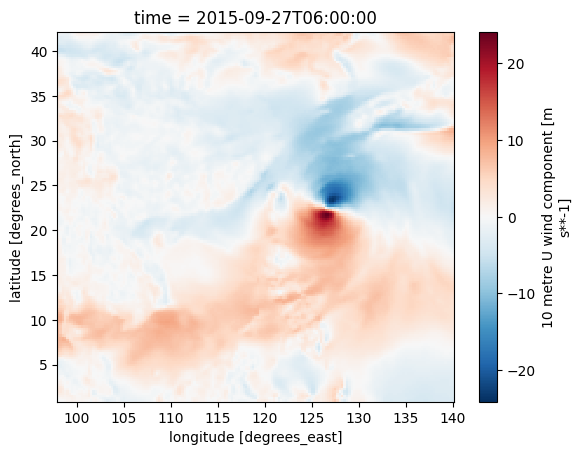

In [9]:
u10['u10'].sel(time="2015-09-27T04:00:00", method="nearest").plot()

In [ ]:
u10 = xr.open_zarr("/datasets/zarr_data_uv_1980/10m_u_component_of_wind.zarr")

In [23]:
u10 = xr.open_zarr("/datasets/zarr_data_temp/10m_u_component_of_wind.zarr")
# data = xarray.open_zarr("/datasets/zarr_data_temp/10m_v_component_of_wind.zarr")
# data = xarray.open_zarr("/datasets/zarr_data_temp/surface_pressure.zarr")
mwp = xr.open_zarr("/datasets/zarr_data_temp/mean_wave_period.zarr")
hs = xr.open_zarr("/datasets/zarr_data_temp/significant_height_of_combined_wind_waves_and_swell.zarr")

<xarray.Dataset> Size: 601GB
Dimensions:    (latitude: 721, longitude: 1440, time: 72312)
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 578kB 1980-01-01 ... 1988-03-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float64 601GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-16 15:13:10 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [4]:
u102['u10'].shape

(4, 721, 1440)

In [19]:
import numpy as np
np.nanmax(hs['swh'][0,].values)


8.592174067724597

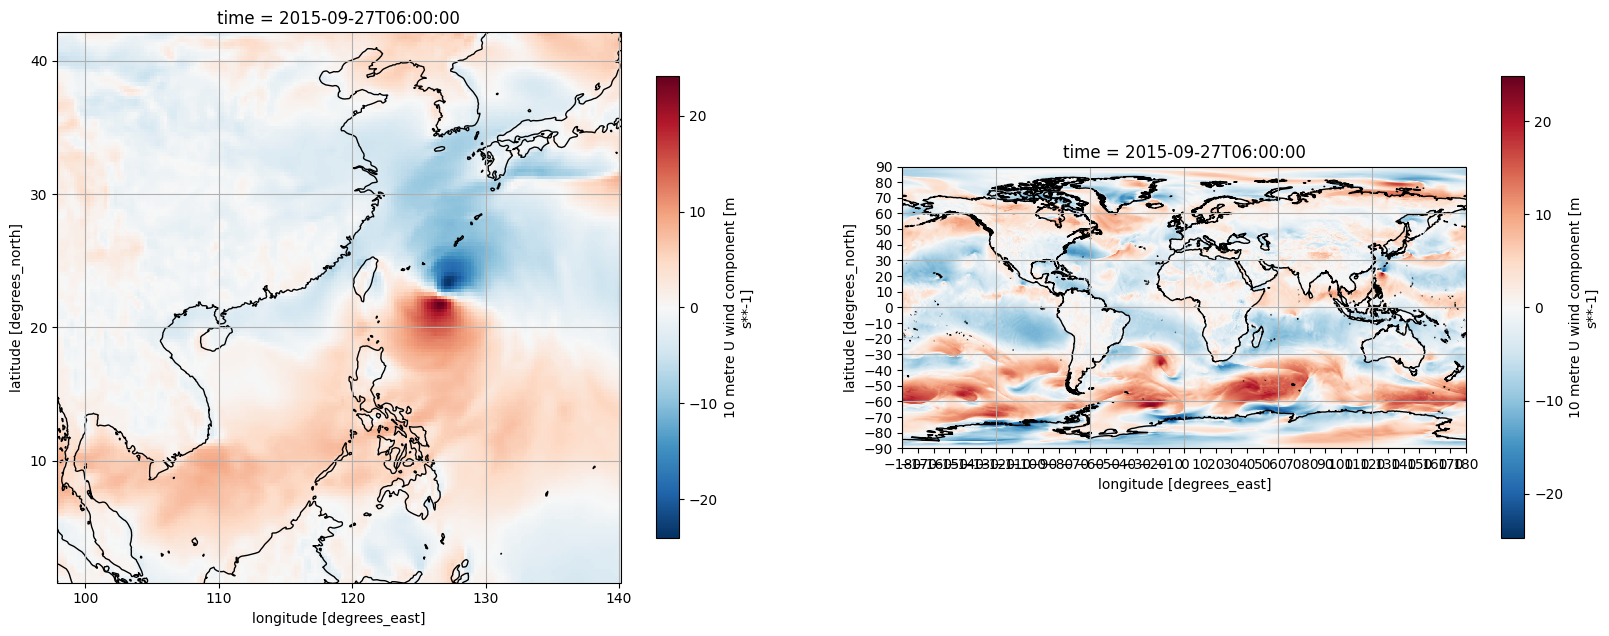

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

ax1.coastlines(resolution="50m")
# 添加经纬度坐标
ax1.set_xticks(range(-180, 181, 10), crs=ccrs.PlateCarree())
ax1.set_yticks(range(-90, 91, 10), crs=ccrs.PlateCarree())
ax1.gridlines(draw_labels=False)
plot1 = u101['u10'].sel(time="2015-09-27T04:00:00", method="nearest").plot(ax=ax1, transform=ccrs.PlateCarree(),cbar_kwargs={"shrink": 0.6})

ax2.coastlines(resolution="50m")
# 添加经纬度坐标
ax2.set_xticks(range(-180, 181, 10), crs=ccrs.PlateCarree())
ax2.set_yticks(range(-90, 91, 10), crs=ccrs.PlateCarree())
ax2.gridlines(draw_labels=False)
plot2 = u102['u10'].sel(time="2015-09-27T04:00:00", method="nearest").plot(ax=ax2, transform=ccrs.PlateCarree(),cbar_kwargs={"shrink": 0.6})